In [0]:
import scipy.io as io
import numpy as np

In [0]:
train_datamat = io.loadmat('indian_pines_Train_patch_3.mat')
train_data = train_datamat['train_patch']
train_labels = train_datamat['train_labels'].transpose()

train_labels1 = train_labels.ravel()
trainLabels = np.zeros((train_labels1.size, train_labels1.max()+1))
trainLabels[np.arange(train_labels1.size),train_labels1] = 1

In [0]:
val_datamat = io.loadmat('indian_pines_Val_patch_3.mat')
val_data = val_datamat['val_patch']
val_labels = val_datamat['val_labels'].transpose()

val_labels1 = val_labels.ravel()
valLabels = np.zeros((val_labels1.size, val_labels1.max()+1))
valLabels[np.arange(val_labels1.size),val_labels1] = 1

In [0]:
test_datamat = io.loadmat('indian_pines_Test_patch_3.mat')
test_data = test_datamat['test_patch']
test_labels = test_datamat['test_labels'].transpose()

test_labels1 = test_labels.ravel()
testLabels = np.zeros((test_labels1.size, test_labels1.max()+1))
testLabels[np.arange(test_labels1.size),test_labels1] = 1

In [0]:
train_data.shape

(1600, 220, 3, 3)

In [0]:
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Lambda, Flatten, Input, Conv2D, Conv1D, Reshape, Concatenate, Dropout

inp = Input(shape=train_data.shape[1:])

c1 = Conv2D(220, kernel_size = 1, activation="relu", data_format="channels_first")(inp)
re1 = Reshape((10, 22, 3*3), input_shape = c1.shape)(c1)
out = []
for i in range(10):
    reshape1 = Lambda(lambda x: x[:,i,:,:])(re1)  
    conv1 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(reshape1)
    conv2 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(conv1)
    conv3 = Conv1D(filters = 10, kernel_size = 3, strides = 1, activation="relu")(conv2)
    conv4 = Conv1D(filters = 5, kernel_size = 5, strides = 1, activation="relu")(conv3)
    reshape2 = Reshape((60, 1), input_shape = conv4.shape)(conv4)
    out.append(reshape2)
outConc = keras.layers.concatenate(out)
reshape3 = Flatten()(outConc)
dense = Dense(100, activation='relu')(reshape3)
dropout = Dropout(0.5)(dense)
op = Dense(9, activation='softmax')(dropout)
model = Model(inputs=[inp], outputs=op)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


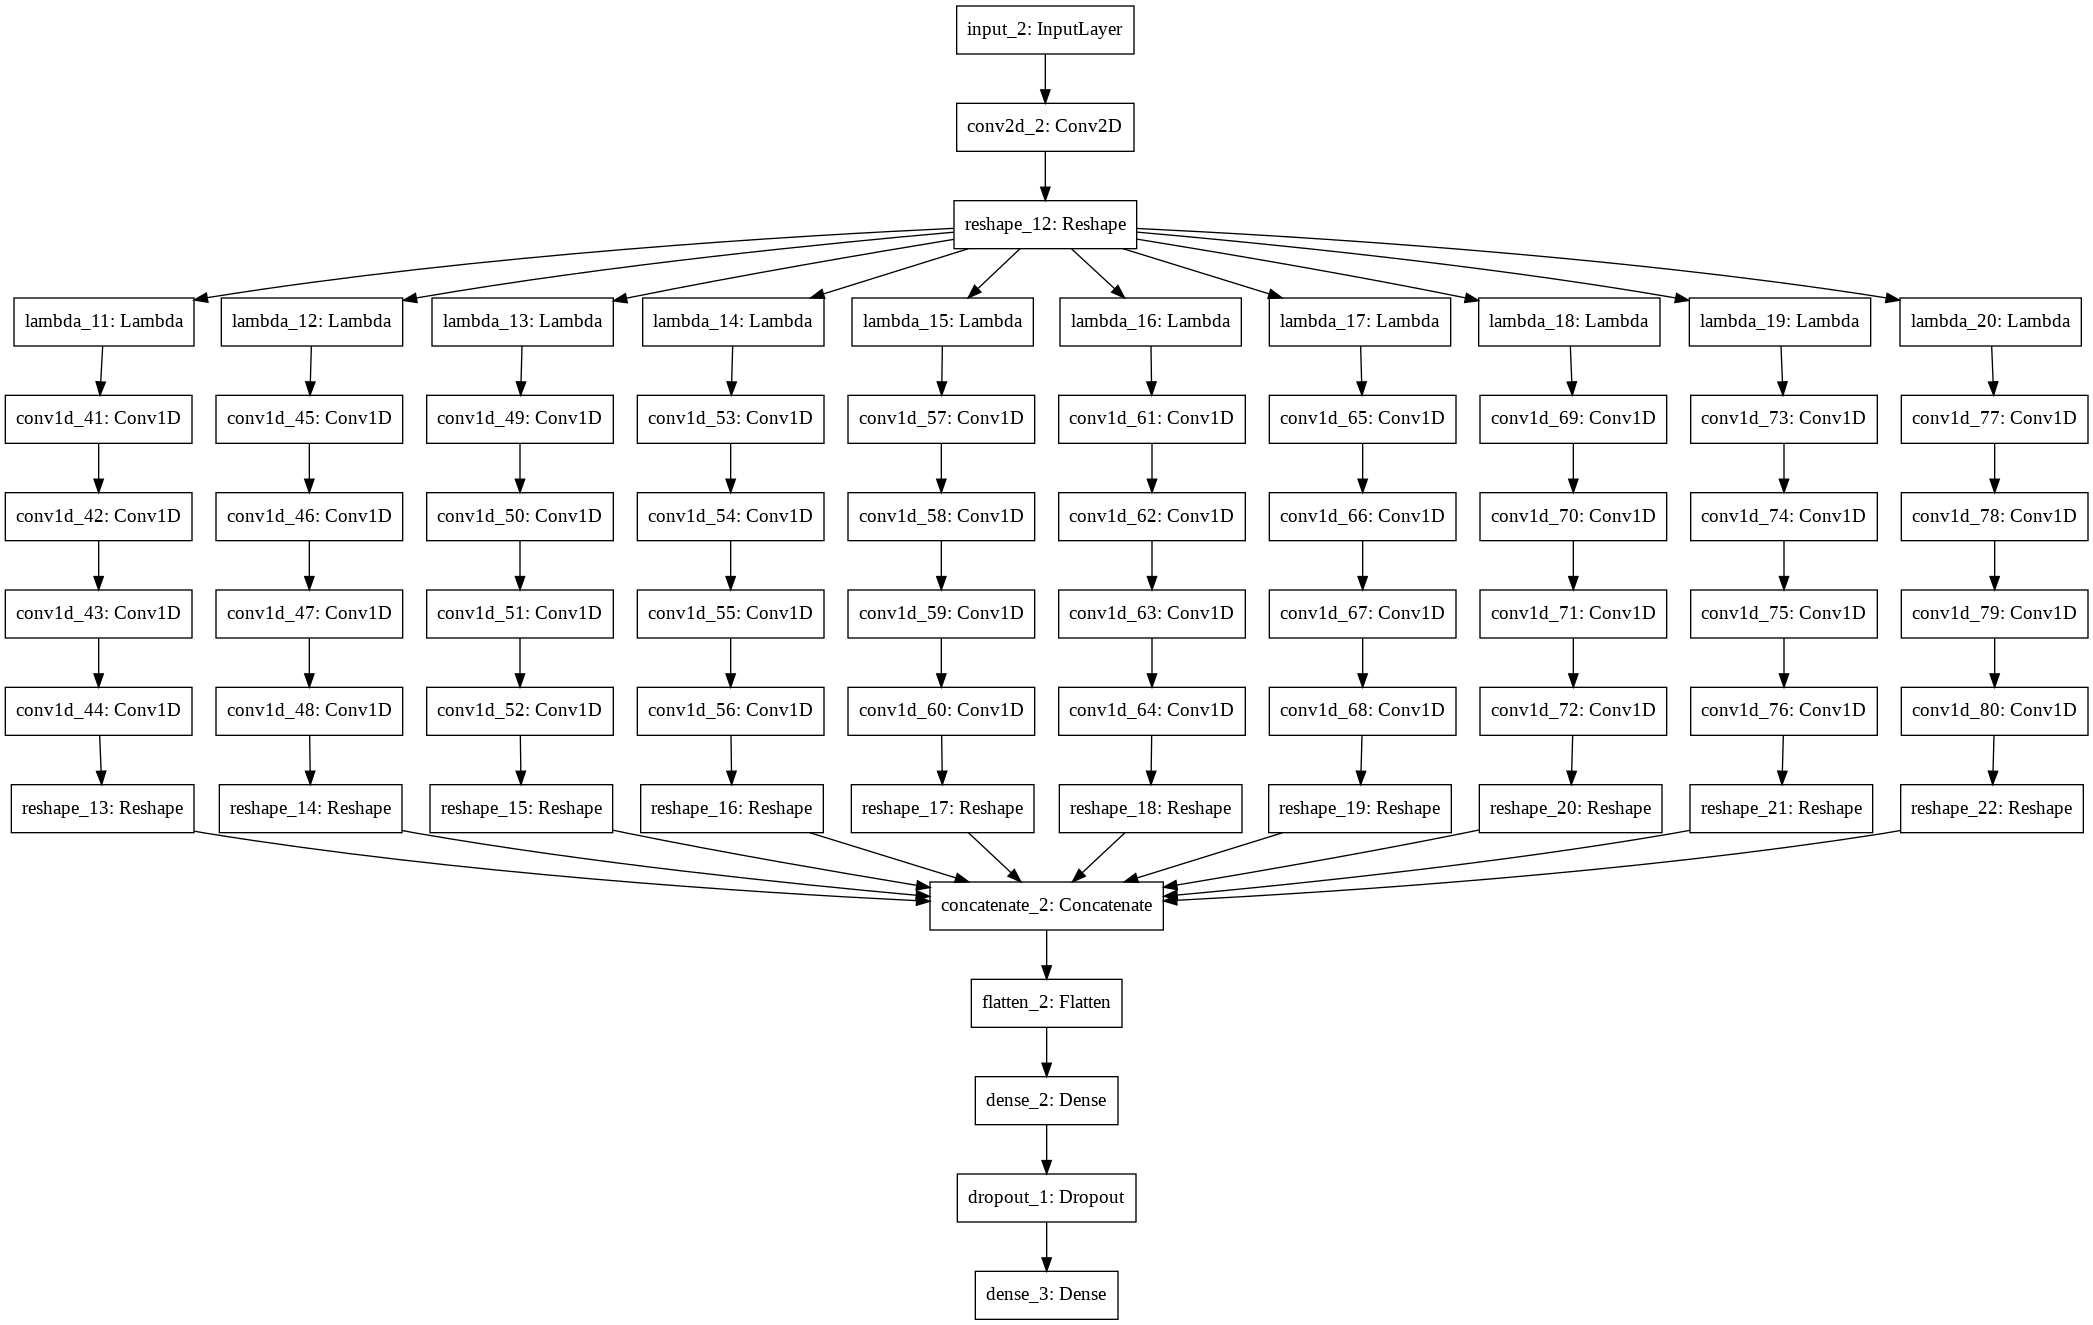

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
from keras.optimizers import adam

ad = adam(lr=0.0005)
model.compile(optimizer=ad, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, trainLabels, validation_data=(val_data, valLabels), batch_size = 200, epochs=1000)

Train on 1600 samples, validate on 200 samples
Epoch 1/1000
1600/1600 [==============================] - 6s 4ms/step - loss: 0.0493 - acc: 0.9856 - val_loss: 0.2201 - val_acc: 0.9400
Epoch 2/1000
1600/1600 [==============================] - 1s 694us/step - loss: 0.0498 - acc: 0.9856 - val_loss: 0.2438 - val_acc: 0.9500
Epoch 3/1000
1600/1600 [==============================] - 1s 686us/step - loss: 0.0496 - acc: 0.9838 - val_loss: 0.2857 - val_acc: 0.9400
Epoch 4/1000
1600/1600 [==============================] - 1s 699us/step - loss: 0.0380 - acc: 0.9869 - val_loss: 0.1375 - val_acc: 0.9650
Epoch 5/1000
1600/1600 [==============================] - 1s 665us/step - loss: 0.0285 - acc: 0.9894 - val_loss: 0.2104 - val_acc: 0.9600
Epoch 6/1000
1600/1600 [==============================] - 1s 676us/step - loss: 0.0262 - acc: 0.9900 - val_loss: 0.3079 - val_acc: 0.9450
Epoch 7/1000
1600/1600 [==============================] - 1s 675us/step - loss: 0.0247 - acc: 0.9931 - val_loss: 0.1738 - val_a

KeyboardInterrupt: ignored

In [0]:
model.evaluate(test_data, testLabels)

7434/7434 [==============================] - 3s 342us/step


[0.5402073061524465, 0.9031476997578692]

In [0]:
model.evaluate(val_data, valLabels)

200/200 [==============================] - 0s 389us/step


[0.3044787368364632, 0.95]

In [0]:
model.evaluate(train_data, trainLabels)

1600/1600 [==============================] - 1s 340us/step


[0.004327859341601652, 0.998125]

In [0]:
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Lambda, Flatten, Input, Conv2D, Conv1D, Reshape, Concatenate, Dropout

inp = Input(shape=[10, 22, 3*3])
out = []
for i in range(10):
    reshape1 = Lambda(lambda x: x[:,i,:,:])(inp)  
    conv1 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(reshape1)
    conv2 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(conv1)
    conv3 = Conv1D(filters = 10, kernel_size = 3, strides = 1, activation="relu")(conv2)
    conv4 = Conv1D(filters = 5, kernel_size = 5, strides = 1, activation="relu")(conv3)
    reshape2 = Reshape((60, 1), input_shape = conv4.shape)(conv4)
    out.append(reshape2)
outConc = keras.layers.concatenate(out)
parallelModel = Model(inputs=[inp], outputs=outConc)

net = Sequential()
net.add(Conv2D(220, kernel_size = 1, activation="relu", data_format="channels_first"))
net.add(Reshape((10, 22, 3*3)))
net.add(parallelModel)
net.add(Flatten())
net.add(Dense(100, activation='relu'))
net.add(Dropout(0.5))
net.add(Dense(9, activation='softmax'))

In [0]:
from keras.optimizers import adam

ad = adam(lr=0.0005)
net.compile(optimizer=ad, loss='categorical_crossentropy', metrics=['accuracy'])
net.fit(train_data, trainLabels, validation_data=(val_data, valLabels), epochs=1000)

Train on 1600 samples, validate on 200 samples
Epoch 1/1000
1600/1600 [==============================] - 6s 4ms/step - loss: 2.0666 - acc: 0.2700 - val_loss: 1.6555 - val_acc: 0.3800
Epoch 2/1000
1600/1600 [==============================] - 2s 1ms/step - loss: 1.5063 - acc: 0.3719 - val_loss: 1.2090 - val_acc: 0.4800
Epoch 3/1000
1600/1600 [==============================] - 2s 1ms/step - loss: 1.2355 - acc: 0.4875 - val_loss: 1.0566 - val_acc: 0.5350
Epoch 4/1000
1600/1600 [==============================] - 2s 1ms/step - loss: 1.1206 - acc: 0.5275 - val_loss: 1.0042 - val_acc: 0.5450
Epoch 5/1000
1600/1600 [==============================] - 2s 1ms/step - loss: 1.0344 - acc: 0.5556 - val_loss: 0.9403 - val_acc: 0.5950
Epoch 6/1000
1600/1600 [==============================] - 2s 1ms/step - loss: 0.9799 - acc: 0.5969 - val_loss: 0.8893 - val_acc: 0.6500
Epoch 7/1000
1600/1600 [==============================] - 2s 1ms/step - loss: 0.9083 - acc: 0.6231 - val_loss: 0.8686 - val_acc: 0.6600
E